# Mid-semester assignment Part 2 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:

## Fashion MNIST with Keras
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://cloudxlab.com/blog/wp-content/uploads/2019/06/Tensorflow_Keras.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

# Neural Network with Tensorflow Keras part 1 (Binary Classification)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

## Load Dataset

4422102/4422102 [==============================] - 0s 0us/step


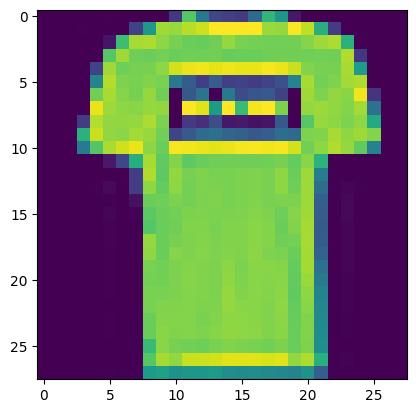

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[1])
plt.show()

## Data preprocessing

### Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data to 1D array
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_flat)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test_flat)

### Select two classes

In [ ]:
# Define the selected classes
selected_classes = [0, 8]

# Create masks for selected classes in both training and test sets
train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

# Apply masks to obtain selected samples for training set
X_train_selected = X_train_scaled[train_mask]
y_train_selected = y_train[train_mask]

# Apply masks to obtain selected samples for test set
X_test_selected = X_test_scaled[test_mask]
y_test_selected = y_test[test_mask]


We need to convert 1-dimensional class arrays to multi-dimensional class matrices<br>


`np_utils.to_categorical` is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector.<br>
Read about np_utils here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
# Define the binary target class
binary_target_class = selected_classes[1]

# Create binary labels for the training set
y_train_binary = (y_train_selected == binary_target_class).astype(int)

# Create binary labels for the test set
y_test_binary = (y_test_selected == binary_target_class).astype(int)

### Build the network layers
Read about Fully connected layers in keras here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Initialize the model
model = Sequential()

# Add input layer and the first hidden layer
model.add(Dense(units=32, activation='relu', input_shape=(X_train_selected.shape[1],)))

# Add the output layer with one neuron (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 25153 (98.25 KB)
Trainable params: 25153 (98.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Build the Optimizer
Read about the Optimizer here: https://keras.io/api/optimizers/

In [ ]:
from tensorflow.keras.optimizers import SGD

# Compile the model with the SGD optimizer
optimizer = SGD(learning_rate=0.001)
# Compile the model with binary_crossentropy loss
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### Training
Use the fit method to train your model, then store the results within the variable "history".


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
history = model.fit(X_train_selected, y_train_binary, epochs=20, batch_size=16, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test_selected)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate the classification report
report = classification_report(y_test_binary, y_pred_binary)

# Print the classification report
print("Classification Report:")
print(report)

Epoch 1/20
600/600 [==============================] - 5s 6ms/step - loss: 0.2652 - accuracy: 0.9310 - val_loss: 0.1539 - val_accuracy: 0.9663
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.1383 - accuracy: 0.9669 - val_loss: 0.1171 - val_accuracy: 0.9708
Epoch 3/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1163 - accuracy: 0.9700 - val_loss: 0.1036 - val_accuracy: 0.9721
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1066 - accuracy: 0.9707 - val_loss: 0.0962 - val_accuracy: 0.9721
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1009 - accuracy: 0.9721 - val_loss: 0.0919 - val_accuracy: 0.9733
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0972 - accuracy: 0.9729 - val_loss: 0.0891 - val_accuracy: 0.9742
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0944 - accuracy: 0.9740 - val_loss: 0.0859 - val_accuracy: 0.9742
Epoch 

### Save Trained model (weights)
Read about Save and load models in tensorflow.keras here: [https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)


In [ ]:
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loss and Accuracy Visualization
Show  on plot the lose during training

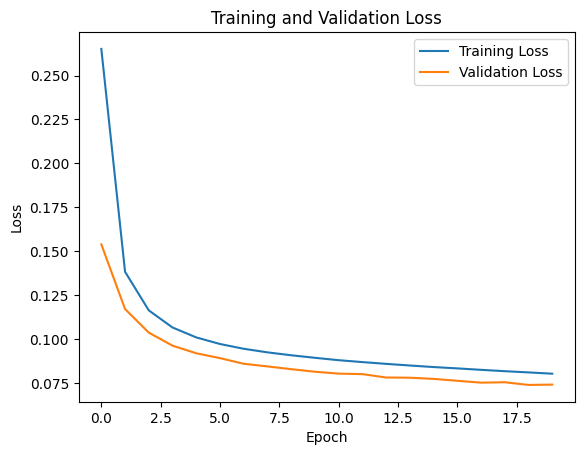

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Show  on plot the accuracy during training

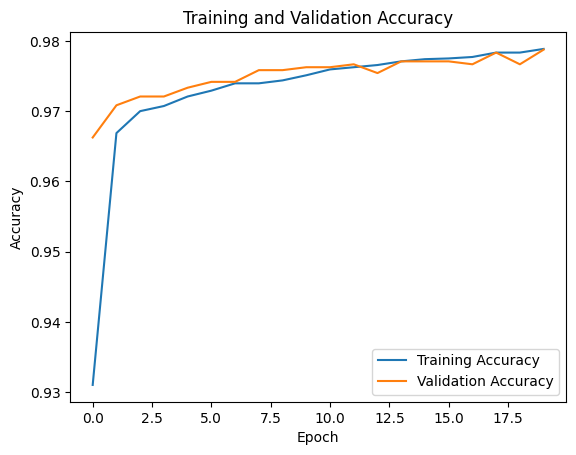

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_selected)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
test_accuracy = np.sum(y_pred_binary.squeeze() == y_test_binary) / len(y_test_binary)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

63/63 [==============================] - 0s 1ms/step
Test Accuracy: 97.85%


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

63/63 [==============================] - 0s 1ms/step


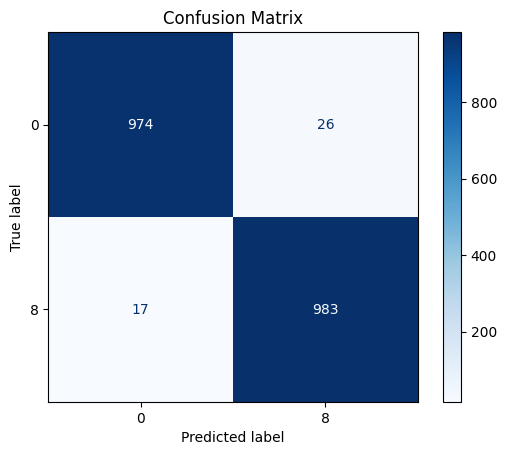

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Define class names
class_names = [str(i) for i in selected_classes]

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".4g")

plt.title('Confusion Matrix')
plt.show()

---
<br>


# Neural Network with Tensorflow Keras part 2 (Multiclass Classification)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Load Dataset

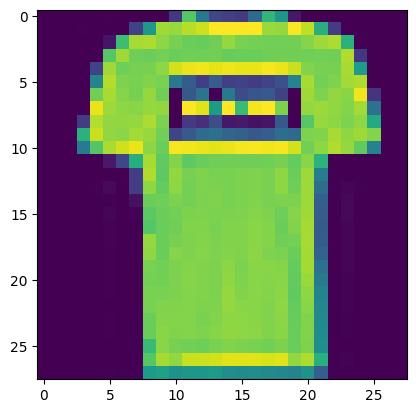

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
plt.imshow(X_train[1])
plt.show()

### The rest you will have to create yourself...

## Models

### Base Model

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5689 - accuracy: 0.8021 - val_loss: 0.4522 - val_accuracy: 0.8411
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4150 - accuracy: 0.8543 - val_loss: 0.4270 - val_accuracy: 0.8497
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3829 - accuracy: 0.8651 - val_loss: 0.4162 - val_accuracy: 0.8535
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3637 - accuracy: 0.8701 - val_loss: 0.3979 - val_accuracy: 0.8572
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3480 - accuracy: 0.8758 - val_loss: 0.3900 - val_accuracy: 0.8600
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3345 - accuracy: 0.8812 - val_loss: 0.4023 - val_accuracy: 0.8547
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3274 - accuracy: 0.8824 - val_loss: 0.3664 - val_accuracy:

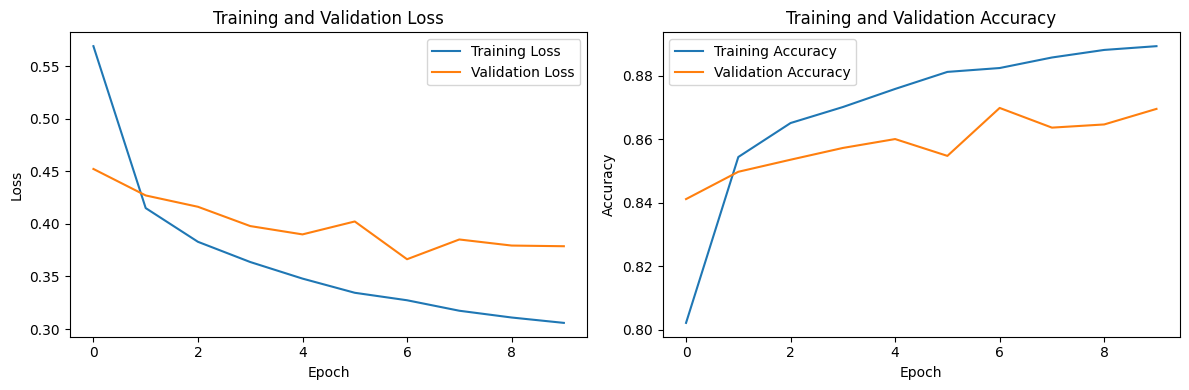

In [ ]:
# Import necessary modules from TensorFlow/Keras
from tensorflow import keras
import matplotlib.pyplot as plt

# Build base model
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),  # Dense layer with 32 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes and softmax activation
])

# Compile model
base_model.compile(
    optimizer='adam',  # Adam optimizer is commonly used for its adaptive learning rate
    loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy for integer-encoded labels
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train model
history = base_model.fit(
    X_train, y_train,            # Training data and labels
    epochs=10,                    # Number of training epochs
    validation_data=(X_test, y_test)  # Validation data for monitoring performance
)

# Plot Classification Report (you need to have scikit-learn installed)
from sklearn.metrics import classification_report

y_pred = base_model.predict(X_test)
y_pred_classes = [round(val) for val in y_pred.argmax(axis=-1)]
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

# Plot Loss and Accuracy Behavior
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

### Experiment number 1

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5223 - accuracy: 0.8141 - val_loss: 0.4388 - val_accuracy: 0.8358
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3806 - accuracy: 0.8614 - val_loss: 0.4106 - val_accuracy: 0.8495
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3462 - accuracy: 0.8721 - val_loss: 0.3655 - val_accuracy: 0.8676
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3225 - accuracy: 0.8819 - val_loss: 0.3714 - val_accuracy: 0.8670
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3042 - accuracy: 0.8869 - val_loss: 0.3509 - val_accuracy: 0.8745
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2915 - accuracy: 0.8921 - val_loss: 0.3531 - val_accuracy: 0.8745
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2821 - accuracy: 0.8942 - val_loss: 0.3418 - val_accuracy

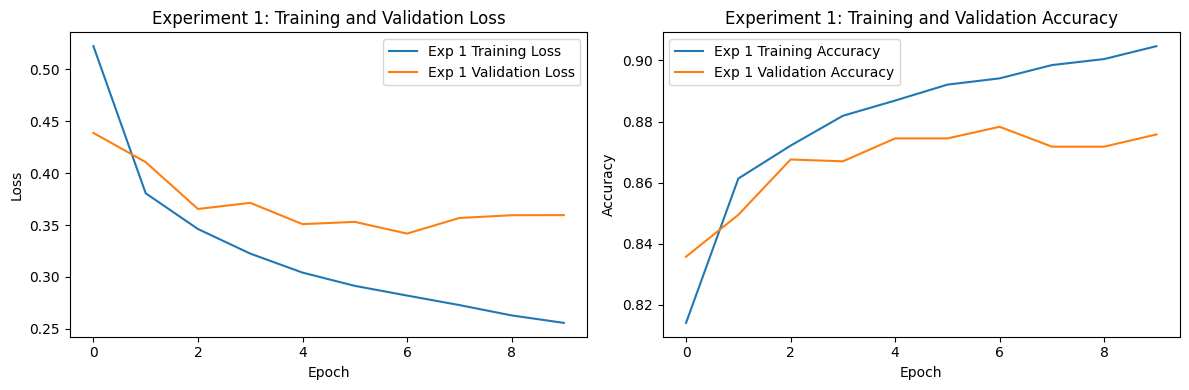

In [ ]:
# Build a modified model (Experiment 1)
exp_1_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer to handle 2D image data
    keras.layers.Dense(64, activation='relu'),   # Dense layer with 64 neurons and ReLU activation
    keras.layers.Dense(64, activation='relu'),   # Additional Dense layer with 64 neurons and ReLU activation
    keras.layers.Dense(32, activation='relu'),   # Dense layer with 32 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output Dense layer with 10 neurons for 10 classes and softmax activation
])

# Compile modified model
exp_1_model.compile(
    optimizer='adam',  # Adam optimizer is commonly used for its adaptive learning rate
    loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy for integer-encoded labels
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train modified model
exp_1_history = exp_1_model.fit(
    X_train, y_train,            # Training data and labels
    epochs=10,                    # Number of training epochs
    validation_data=(X_test, y_test)  # Validation data for monitoring performance
)

# Classification Report for Experiment 1
y_exp_1_pred = exp_1_model.predict(X_test)
y_exp_1_pred_classes = [round(val) for val in y_exp_1_pred.argmax(axis=-1)]
print("Experiment 1 Classification Report:\n", classification_report(y_test, y_exp_1_pred_classes))

# Loss and Accuracy Behavior for Experiment 1
plt.figure(figsize=(12, 4))

# Plot Loss for Experiment 1
plt.subplot(1, 2, 1)
plt.plot(exp_1_history.history['loss'], label='Exp 1 Training Loss')
plt.plot(exp_1_history.history['val_loss'], label='Exp 1 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Experiment 1: Training and Validation Loss')

# Plot Accuracy for Experiment 1
plt.subplot(1, 2, 2)
plt.plot(exp_1_history.history['accuracy'], label='Exp 1 Training Accuracy')
plt.plot(exp_1_history.history['val_accuracy'], label='Exp 1 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Experiment 1: Training and Validation Accuracy')

plt.tight_layout()
plt.show()


### Experiment number 2

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5020 - accuracy: 0.8233 - val_loss: 0.4225 - val_accuracy: 0.8513
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3741 - accuracy: 0.8639 - val_loss: 0.3818 - val_accuracy: 0.8642
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3338 - accuracy: 0.8784 - val_loss: 0.3979 - val_accuracy: 0.8527
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3098 - accuracy: 0.8858 - val_loss: 0.3429 - val_accuracy: 0.8774
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2919 - accuracy: 0.8925 - val_loss: 0.3624 - val_accuracy: 0.8689
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2763 - accuracy: 0.8985 - val_loss: 0.3651 - val_accuracy: 0.8723
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2634 - accuracy: 0.9025 - val_loss: 0.3407 - val_accuracy:

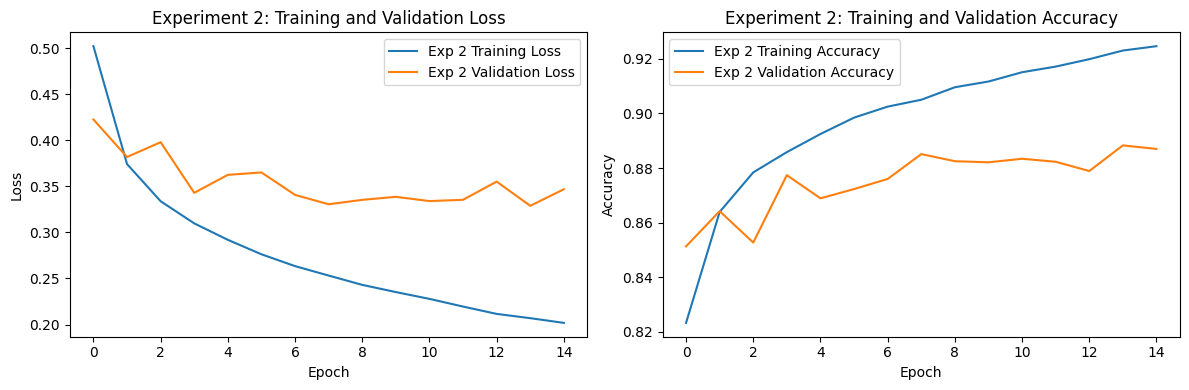

In [ ]:
# Experiment 2
exp_2_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer to handle 2D image data
    keras.layers.Dense(128, activation='relu'),   # Dense layer with 128 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax')   # Output Dense layer with 10 neurons for 10 classes and softmax activation
])

# Compile model with changed hyperparameters
exp_2_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with a modified learning rate
    loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy for integer-encoded labels
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train model
exp_2_history = exp_2_model.fit(
    X_train, y_train,            # Training data and labels
    epochs=15,                   # Increased number of training epochs
    validation_data=(X_test, y_test)  # Validation data for monitoring performance
)

# Classification Report for Experiment 2
y_exp_2_pred = exp_2_model.predict(X_test)
y_exp_2_pred_classes = [round(val) for val in y_exp_2_pred.argmax(axis=-1)]
print("Experiment 2 Classification Report:\n", classification_report(y_test, y_exp_2_pred_classes))

# Loss and Accuracy Behavior for Experiment 2
plt.figure(figsize=(12, 4))

# Plot Loss for Experiment 2
plt.subplot(1, 2, 1)
plt.plot(exp_2_history.history['loss'], label='Exp 2 Training Loss')
plt.plot(exp_2_history.history['val_loss'], label='Exp 2 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Experiment 2: Training and Validation Loss')

# Plot Accuracy for Experiment 2
plt.subplot(1, 2, 2)
plt.plot(exp_2_history.history['accuracy'], label='Exp 2 Training Accuracy')
plt.plot(exp_2_history.history['val_accuracy'], label='Exp 2 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Experiment 2: Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# Save best model
exp_2_model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### Load trained model

In [ ]:
# Load the trained models
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.h5')

### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single image of an item of clothing (28x28 image).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before) and prints a prediction.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from numpy import load as load_npy
from google.colab import files
files.upload()

{}

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Define a function to make predictions on input images
def predict_image(image_path):
    # Load the image using numpy
    image = np.load(image_path)

    # Preprocess the image (assuming normalization is required)
    # You might need to adjust this based on your preprocessing during training
    # For example, you can normalize the image by dividing by 255:
    image = image / 255.0

    # Make a prediction
    prediction = best_model.predict(np.expand_dims(image, axis=0))

    # Get the class with the highest probability
    predicted_class = np.argmax(prediction)

    # Return the predicted class
    return predicted_class

# Example usage:
image_path = 'path/to/your/image.npy'
predicted_class = predict_image(image_path)

# Print the predicted class (you can replace this with your class labels)
print(f"The input image is classified as class: {predicted_class}")


ValueError: ignored